In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [213]:
df = pd.read_csv('border-wait-times-at-us-canada-border.csv')

In [214]:
df.shape

(100817, 19)

In [215]:
df.columns

Index(['borderid', 'canadaport', 'americaport', 'tripdirection', 'localhour',
       'localdate', 'daytype', 'utc_date', 'utc_hour', 'averageduration',
       'aggregationmethod', 'canadaborderzone', 'can_iso_3166_2',
       'americaborderzone', 'us_iso_3166_2', 'borderlatitude',
       'borderlongitude', 'bordergeohash', 'version'],
      dtype='object')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100817 entries, 0 to 100816
Data columns (total 19 columns):
borderid             100817 non-null int64
canadaport           100817 non-null object
americaport          100817 non-null object
tripdirection        100817 non-null object
localhour            100817 non-null int64
localdate            100817 non-null object
daytype              100817 non-null object
utc_date             100817 non-null object
utc_hour             100817 non-null int64
averageduration      100817 non-null float64
aggregationmethod    100817 non-null object
canadaborderzone     100817 non-null object
can_iso_3166_2       100817 non-null object
americaborderzone    100817 non-null object
us_iso_3166_2        100817 non-null object
borderlatitude       100817 non-null float64
borderlongitude      100817 non-null float64
bordergeohash        100817 non-null object
version              100817 non-null int64
dtypes: float64(3), int64(4), object(12)
memory usage:

In [217]:
df.isnull().sum()

borderid             0
canadaport           0
americaport          0
tripdirection        0
localhour            0
localdate            0
daytype              0
utc_date             0
utc_hour             0
averageduration      0
aggregationmethod    0
canadaborderzone     0
can_iso_3166_2       0
americaborderzone    0
us_iso_3166_2        0
borderlatitude       0
borderlongitude      0
bordergeohash        0
version              0
dtype: int64

In [218]:
df.head(3)

,borderid,canadaport,americaport,tripdirection,localhour,localdate,daytype,utc_date,utc_hour,averageduration,aggregationmethod,canadaborderzone,can_iso_3166_2,americaborderzone,us_iso_3166_2,borderlatitude,borderlongitude,bordergeohash,version
0,8,Kingsgate,Eastport,US to Canada,6,2020-01-01,Weekdays,2020-01-01,13,2.94,Yearly Average,"POLYGON ((-116.181846857 49.002442186, -116.18...",CA-BC,"POLYGON ((-116.182157993 49.0004573163, -116.1...",US-ID,49.001,-116.181,c2tqu0r,1
1,8,Kingsgate,Eastport,Canada to US,16,2020-01-01,Weekdays,2020-01-01,23,5.26,Monthly Average,"POLYGON ((-116.181846857 49.002442186, -116.18...",CA-BC,"POLYGON ((-116.182157993 49.0004573163, -116.1...",US-ID,49.001,-116.181,c2tqu0r,1
2,8,Kingsgate,Eastport,US to Canada,7,2020-01-01,Weekdays,2020-01-01,14,3.85,Yearly Average,"POLYGON ((-116.181846857 49.002442186, -116.18...",CA-BC,"POLYGON ((-116.182157993 49.0004573163, -116.1...",US-ID,49.001,-116.181,c2tqu0r,1


In [219]:
df.borderid.unique(),df.canadaport.unique()

(array([  8, 100, 104,  64,  35,  55,  65,  68, 117,  18,  13,  15,  71,
         70,  66,  73, 108,  12,  62,  61,  28,  26, 102,  77,  46,  47,
         52,  88,  91,  83,  27,  25,  60,  37,  76,  50,  98,  85,  38,
        116,  69,  72,  81,  97,  96,  90,  92,  24,  16,  56,  80,  59,
         67,   6,  14,  36,  19,  45, 105,  51,  99, 119,  31,  87],
       dtype=int64),
 array(['Kingsgate', 'Lacolle:Route 221', 'Lacolle:Route 223', 'Lansdowne',
        'Lyleton', 'Milltown', 'Niagara Falls - Rainbow Bridge',
        'Niagara Falls - Whirlpool Rapids Bridge', 'North Portal',
        'Osoyoos', 'Pacific Highway', 'Paterson', 'Pigeon River',
        'Prescott', 'Queenston', 'Rainy River', 'Regway', 'Roosville',
        'Sarnia', 'Sault Ste. Marie', 'South Junction', 'Sprague',
        'St-Bernard-de-Lacolle', 'St-Just-de-Bretenières', 'St. Leonard',
        'St. Stephen (3rd Bridge)', 'St. Stephen (Ferry Point Bridge)',
        'Stanhope', 'Stanstead(55)', 'St–Armand/ Phillipsbur

In [325]:
df.utc_date.value_counts()

2020-03-19    1235
2020-03-20    1235
2020-03-13    1234
2020-03-18    1234
2020-03-25    1233
              ... 
2020-02-09     700
2020-01-12     699
2020-01-26     699
2020-01-05     698
2020-02-02     697
Name: utc_date, Length: 94, dtype: int64

In [220]:
# not needed columns
# borderid, version
#

In [221]:
df.americaport.nunique(),df.localdate.nunique()

(64, 94)

In [222]:
df.tripdirection.nunique()

2

In [223]:
df.daytype.unique()

array(['Weekdays', 'Weekends'], dtype=object)

In [224]:
df.can_iso_3166_2.nunique()

8

C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """Entry point for launching an IPython kernel.


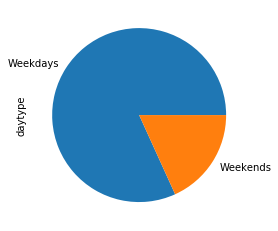

In [391]:
df.daytype.value_counts().plot('pie')

In [466]:
ax = df.groupby('daytype')['averageduration'].agg(np.mean)
ax

daytype
Weekdays    6.820263
Weekends    7.969908
Name: averageduration, dtype: float64

Text(0.5, 1.0, 'Total number of people travelled')

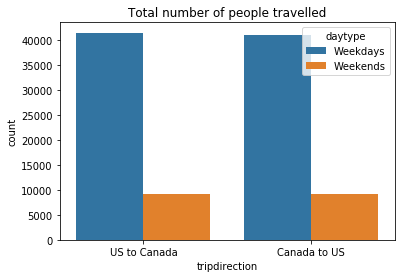

In [519]:
# ax = df.groupby('tripdirection','daytype')['averageduration'].agg(np.mean)
# ax
sns.countplot(x = "tripdirection", hue = "daytype", data = df).set_title('Total number of people travelled')

In [468]:
def fun(time):
    if time < 3:
        return "Below3_Hr"
    elif 3 <= time < 5:
        return "Between_3_to_5Hr"
    else:
        return "Morethan_5Hr"

df['timetaken'] = df.averageduration.apply(lambda x: fun(x))

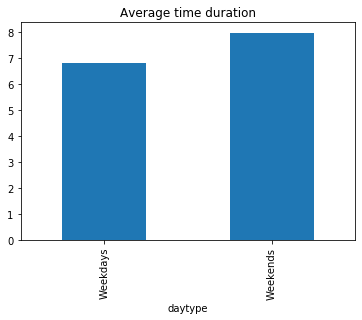

In [517]:
ax.plot.bar(title='Average time duration')

In [230]:
df_avg4 = df[df['averageduration'] >5]
df_avg4.shape

(61460, 20)

In [231]:
ax = df_avg4.groupby('daytype')['averageduration'].sum()
ax

daytype
Weekdays    433075.41
Weekends    126793.09
Name: averageduration, dtype: float64

In [232]:
ax = df.groupby(['daytype'])['timetaken'].value_counts()
ax

daytype   timetaken       
Weekdays  Morethan_5Hr        48002
          Between_3_to_5Hr    27691
          Below3_Hr            6767
Weekends  Morethan_5Hr        13653
          Between_3_to_5Hr     4512
          Below3_Hr             192
Name: timetaken, dtype: int64

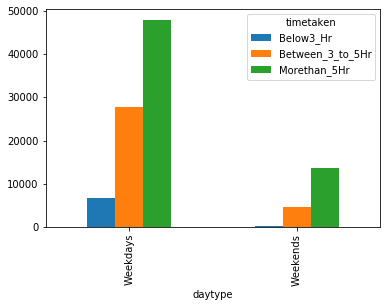

In [398]:
ax.unstack().plot(kind='bar')

<Figure size 720x720 with 0 Axes>

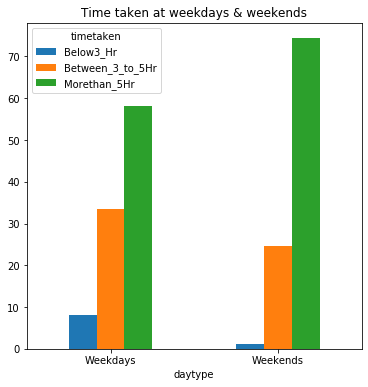

In [521]:
freq_df = df.groupby(['timetaken'])['daytype'].value_counts().unstack(0)
plt.figure(figsize=(10,10))
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df = pct_df.mul(100)
pct_df.plot(kind="bar", stacked=False,figsize=(6,6),rot=0,title='Time taken at weekdays & weekends')

In [235]:
#df = df.sample(100)
df.daytype.nunique()

2

In [236]:
df.localhour.unique()

array([ 6, 16,  7, 17,  9, 21, 10, 11, 12, 13, 14, 15, 23, 18, 19, 20,  8,
        1, 22,  2,  3,  0,  5,  4], dtype=int64)

In [237]:
def hour(x):
    if 0<= x < 5:
        return 'Midnight'
    elif 5<= x < 12:
        return 'Morning'
    elif 12 <= x < 17:
        return 'Afternoon'
    elif 17 <=x <= 24:
        return 'Evening'
df['whattime_day'] = df.utc_hour.apply(lambda x: hour(x))

In [444]:
df.head(3)

,borderid,canadaport,americaport,tripdirection,localhour,localdate,daytype,utc_date,utc_hour,averageduration,...,can_iso_3166_2,americaborderzone,us_iso_3166_2,borderlatitude,borderlongitude,bordergeohash,version,timetaken,whattime_day,month
0,8,Kingsgate,Eastport,US to Canada,6,2020-01-01,Weekdays,2020-01-01,13,2.94,...,CA-BC,"POLYGON ((-116.182157993 49.0004573163, -116.1...",US-ID,49.001,-116.181,c2tqu0r,1,Below3_Hr,Afternoon,Jan
1,8,Kingsgate,Eastport,Canada to US,16,2020-01-01,Weekdays,2020-01-01,23,5.26,...,CA-BC,"POLYGON ((-116.182157993 49.0004573163, -116.1...",US-ID,49.001,-116.181,c2tqu0r,1,Morethan_5Hr,Evening,Jan
2,8,Kingsgate,Eastport,US to Canada,7,2020-01-01,Weekdays,2020-01-01,14,3.85,...,CA-BC,"POLYGON ((-116.182157993 49.0004573163, -116.1...",US-ID,49.001,-116.181,c2tqu0r,1,Between_3_to_5Hr,Afternoon,Jan


In [239]:
df.shape

(100817, 21)

In [481]:
sr = df.whattime_day.value_counts()
sr = sr.to_frame()
sr = sr.reset_index()

In [482]:
#df.whattime_day.value_counts().plot('pie')
sr = sr.rename(columns = {'index'
                          :'names'})
sr
#plt.pie(df['whattime_day'].value_counts(),labels=sr.names.values)

,names,whattime_day
0,Evening,37951
1,Afternoon,25442
2,Morning,19014
3,Midnight,18410


In [483]:
sr = sr.rename(columns = {'index'
                          :'names'})

In [484]:
sr.names.values

array(['Evening', 'Afternoon', 'Morning', 'Midnight'], dtype=object)

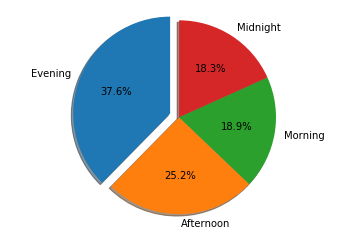

In [485]:
#lis = df.whattime_day.unique()
labels = sr.names.values
sizes = df.whattime_day.value_counts(ascending=False)
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [314]:
df.utc_date[1200]

'2020-02-18'

In [353]:
def utc_month(x):
    if x.split('-')[1] == '01':
        return 'Jan'
    elif x.split('-')[1] == '02':
        return 'Feb'
    elif x.split('-')[1] == '03':
        return 'March'
    elif x.split('-')[1] == '04':
        return 'April'
    elif x.split('-')[1] == '05':
        return 'May'
    elif x.split('-')[1] == '12':
        return 'Dec'
    else:
        y = x.split('-')[1]
        return y

In [358]:
df['month'] = df.localdate.apply(lambda x: utc_month(x))

In [359]:
df.month.value_counts()

Jan      33602
March    33522
Feb      30599
April     3094
Name: month, dtype: int64

In [489]:
sr = df.month.value_counts()
sr = sr.to_frame()
sr = sr.reset_index()
sr = sr.rename(columns = {'index'
                          :'names'})

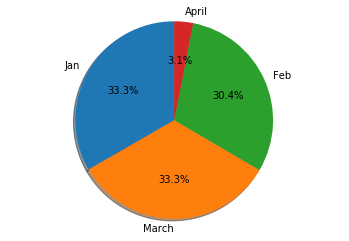

In [491]:
labels = sr.names.values
sizes = df.month.value_counts(ascending=False)
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [364]:
df.groupby(['tripdirection','month'])['month'].value_counts()

tripdirection  month  month
Canada to US   April  April     1558
               Feb    Feb      15206
               Jan    Jan      16731
               March  March    16688
US to Canada   April  April     1536
               Feb    Feb      15393
               Jan    Jan      16871
               March  March    16834
Name: month, dtype: int64

<Figure size 720x720 with 0 Axes>

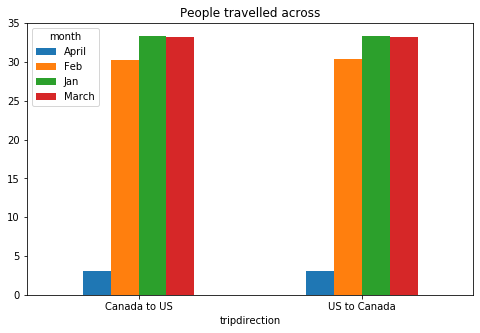

In [458]:
freq_df = df.groupby(['tripdirection'])['month'].value_counts().unstack()
plt.figure(figsize=(10,10))
my_colors = 'rgbymc'
palette = {"Jan":'C0',"Feb":"C1","March":"C2","April":"C3"}
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df = pct_df.mul(100)
pct_df.plot(kind="bar", stacked=False,figsize=(8,5),rot=0,title='People travelled across')

In [409]:
df.timetaken.unique()

array(['Below3_Hr', 'Morethan_5Hr', 'Between_3_to_5Hr'], dtype=object)

In [500]:
df_port = df[df['timetaken'] == 'Morethan_5Hr']

In [501]:
df_port.shape

(61655, 23)

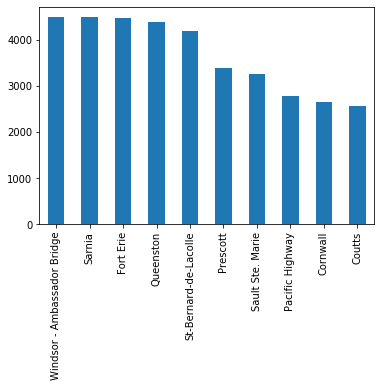

In [442]:
df_port['canadaport'].value_counts().head(10).plot(kind='bar',)

<Figure size 720x720 with 0 Axes>

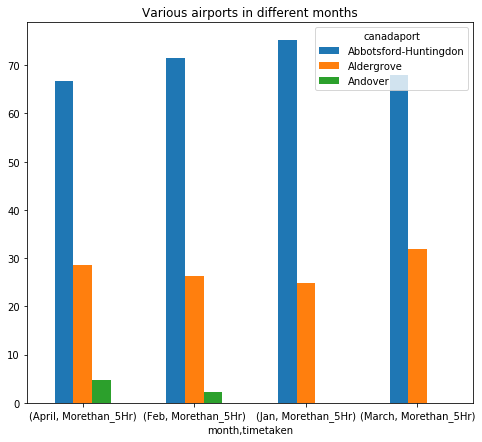

In [463]:
freq_df = df_port.groupby(['canadaport','month'])['timetaken'].value_counts().head(10).unstack(0)
plt.figure(figsize=(10,10))
my_colors = 'rgbymc'
#palette = {"Jan":'C0',"Feb":"C1","March":"C2","April":"C3"}
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df = pct_df.mul(100)
pct_df.plot(kind="bar", stacked=False,figsize=(8,7),rot=0,title='Various airports in different months')

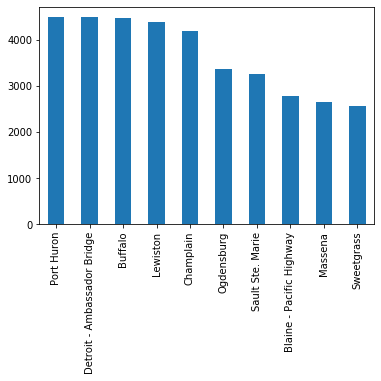

In [424]:
df_port['americaport'].value_counts().head(10).plot(kind='bar')

<Figure size 720x720 with 0 Axes>

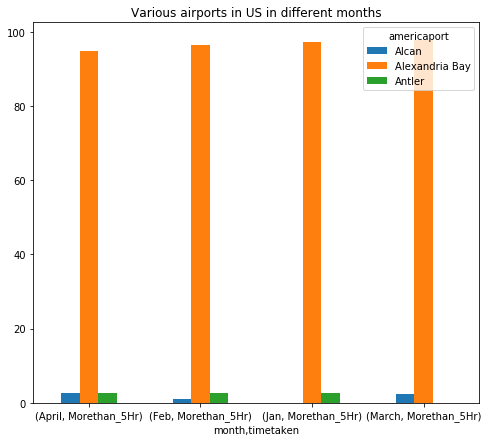

In [508]:
freq_df = df_port.groupby(['americaport','month'])['timetaken'].value_counts().head(10).unstack(0)
plt.figure(figsize=(10,10))
my_colors = 'rgbymc'
#palette = {"Jan":'C0',"Feb":"C1","March":"C2","April":"C3"}
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df = pct_df.mul(100)
pct_df.plot(kind="bar", stacked=False,figsize=(8,7),rot=0,title='Various airports in US in different months')

In [493]:
df.utc_date[0]

'2020-01-01'

In [496]:
def utc_week(x):
    a = x.split('-')[2]
    a = int(a)
    if 1<= a <=7:
        return 'Week1'
    elif 7 <a<=14:
        return 'Week2'
    elif 14 <a<=21:
        return 'Week3'
    else:
        return 'Week4'

df['week'] = df.utc_date.apply(lambda x: utc_week(x))

In [498]:
df.week.value_counts()

Week4    30137
Week1    25523
Week3    22592
Week2    22565
Name: week, dtype: int64

In [ ]:
df_usport = df[df['timetaken'] == 'Morethan_5Hr']

<Figure size 720x720 with 0 Axes>

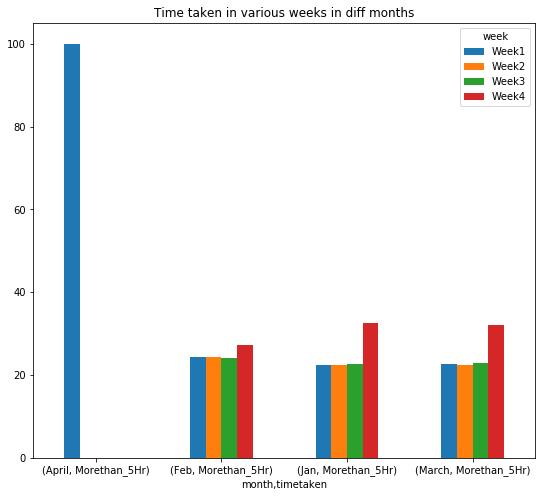

In [514]:
freq_df = df_port.groupby(['week','month'])['timetaken'].value_counts().unstack(0)
plt.figure(figsize=(10,10))
my_colors = 'rgbymc'
#palette = {"Jan":'C0',"Feb":"C1","March":"C2","April":"C3"}
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df = pct_df.mul(100)
pct_df.plot(kind="bar", stacked=False,figsize=(9,8),rot=0,title='Time taken in various weeks in diff months')

In [241]:
df.columns

Index(['borderid', 'canadaport', 'americaport', 'tripdirection', 'localhour',
       'localdate', 'daytype', 'utc_date', 'utc_hour', 'averageduration',
       'aggregationmethod', 'canadaborderzone', 'can_iso_3166_2',
       'americaborderzone', 'us_iso_3166_2', 'borderlatitude',
       'borderlongitude', 'bordergeohash', 'version', 'timetaken',
       'whattime_day'],
      dtype='object')